In [1]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras import regularizers
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn import preprocessing
import sys
# from preprocess import * 
import os
from IPython.display import display
from IPython.display import clear_output

### Load data

In [2]:
# import geometry input data and stress-strain output data
xdata=pd.read_csv("../dataset/geometry_input.csv",header=None)
xdata=xdata.values
ydata=pd.read_csv("../dataset/stress_output.csv",header=None)
ydata=ydata.values
# dimensions of input and output data
xdata.shape, ydata.shape

((30000, 16), (30000, 100))

In [3]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(xdata, ydata, test_size=0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((24000, 16), (24000, 100), (6000, 16), (6000, 100))

### Principal component analysis (PCA) for stress-strain curves

In [4]:
# Principal component analysis (PCA)
pca_number = 10;
pca = PCA(n_components=pca_number)
y_train_reduced = pca.fit_transform(y_train)
# record explained variance
explained_variance = pca.explained_variance_ratio_

# calculate the reconstruction error
av_err = 0
for k in range(0,y_train.shape[0]):
    av_err += (mean_squared_error(y_train[k,:],pca.inverse_transform(y_train_reduced[k,:]))/mean_squared_error(y_train[k,:],y_train[k,:]*0))**0.5
print('average reconstruction error: '+str(av_err/y_train.shape[0]))

average reconstruction error: 0.003119020582892107


### Neural network 

In [5]:
# build neural netwrok (NN)
model = Sequential()
model.add(Dense(200, input_dim=xdata.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(pca_number, activation='linear'))
model.summary()
model.compile(loss = 'mse', optimizer='adam', metrics=['mse','mae'], loss_weights=explained_variance*1e3)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               3400      
_________________________________________________________________
dense_1 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_3 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2010      
Total params: 126,010
Trainable params: 126,010
Non-trainable params: 0
_________________________________________________________________


In [6]:
# fit NN
history=model.fit(X_train, y_train_reduced, epochs=100, batch_size=64,  verbose=1, validation_split=0.1)

Epoch 1/100
338/338 [==============================] - 1s 3ms/step - loss: 0.0412 - mse: 4.1237e-04 - mae: 0.0087 - val_loss: 0.0134 - val_mse: 1.3442e-04 - val_mae: 0.0053
Epoch 2/100
338/338 [==============================] - 0s 1ms/step - loss: 0.0111 - mse: 1.1072e-04 - mae: 0.0047 - val_loss: 0.0087 - val_mse: 8.7124e-05 - val_mae: 0.0042
Epoch 3/100
338/338 [==============================] - 0s 1ms/step - loss: 0.0076 - mse: 7.6147e-05 - mae: 0.0040 - val_loss: 0.0067 - val_mse: 6.7348e-05 - val_mae: 0.0037
Epoch 4/100
338/338 [==============================] - 0s 1ms/step - loss: 0.0062 - mse: 6.1962e-05 - mae: 0.0036 - val_loss: 0.0062 - val_mse: 6.2457e-05 - val_mae: 0.0035
Epoch 5/100
338/338 [==============================] - 0s 1ms/step - loss: 0.0051 - mse: 5.1170e-05 - mae: 0.0033 - val_loss: 0.0052 - val_mse: 5.2406e-05 - val_mae: 0.0032
Epoch 6/100
338/338 [==============================] - 0s 1ms/step - loss: 0.0044 - mse: 4.4142e-05 - mae: 0.0031 - val_loss: 0.0050 - 

338/338 [==============================] - 0s 1ms/step - loss: 8.7323e-04 - mse: 8.7350e-06 - mae: 0.0015 - val_loss: 0.0022 - val_mse: 2.2204e-05 - val_mae: 0.0020
Epoch 49/100
338/338 [==============================] - 0s 1ms/step - loss: 8.3891e-04 - mse: 8.3918e-06 - mae: 0.0015 - val_loss: 0.0025 - val_mse: 2.4672e-05 - val_mae: 0.0021
Epoch 50/100
338/338 [==============================] - 0s 1ms/step - loss: 9.4958e-04 - mse: 9.4988e-06 - mae: 0.0016 - val_loss: 0.0023 - val_mse: 2.3336e-05 - val_mae: 0.0020
Epoch 51/100
338/338 [==============================] - 0s 1ms/step - loss: 8.5957e-04 - mse: 8.5984e-06 - mae: 0.0015 - val_loss: 0.0025 - val_mse: 2.4810e-05 - val_mae: 0.0020
Epoch 52/100
338/338 [==============================] - 0s 1ms/step - loss: 8.0638e-04 - mse: 8.0663e-06 - mae: 0.0015 - val_loss: 0.0022 - val_mse: 2.2018e-05 - val_mae: 0.0020
Epoch 53/100
338/338 [==============================] - 0s 1ms/step - loss: 7.3672e-04 - mse: 7.3695e-06 - mae: 0.0014 - va

338/338 [==============================] - 0s 1ms/step - loss: 5.2604e-04 - mse: 5.2620e-06 - mae: 0.0012 - val_loss: 0.0020 - val_mse: 2.0262e-05 - val_mae: 0.0019
Epoch 95/100
338/338 [==============================] - 0s 1ms/step - loss: 5.0268e-04 - mse: 5.0283e-06 - mae: 0.0012 - val_loss: 0.0021 - val_mse: 2.0763e-05 - val_mae: 0.0019
Epoch 96/100
338/338 [==============================] - 0s 1ms/step - loss: 5.3145e-04 - mse: 5.3162e-06 - mae: 0.0012 - val_loss: 0.0020 - val_mse: 1.9769e-05 - val_mae: 0.0019
Epoch 97/100
338/338 [==============================] - 0s 1ms/step - loss: 5.5376e-04 - mse: 5.5393e-06 - mae: 0.0013 - val_loss: 0.0022 - val_mse: 2.1641e-05 - val_mae: 0.0020
Epoch 98/100
338/338 [==============================] - 0s 1ms/step - loss: 5.6846e-04 - mse: 5.6864e-06 - mae: 0.0013 - val_loss: 0.0018 - val_mse: 1.8058e-05 - val_mae: 0.0018
Epoch 99/100
338/338 [==============================] - 0s 1ms/step - loss: 4.8619e-04 - mse: 4.8634e-06 - mae: 0.0012 - va

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


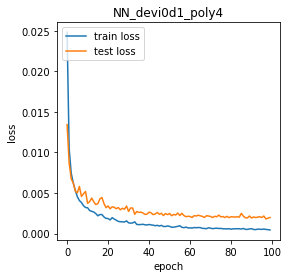

In [7]:
plt.rcParams["figure.figsize"]=4,4
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('NN_devi0d1_poly4')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc='upper left')
plt.show()

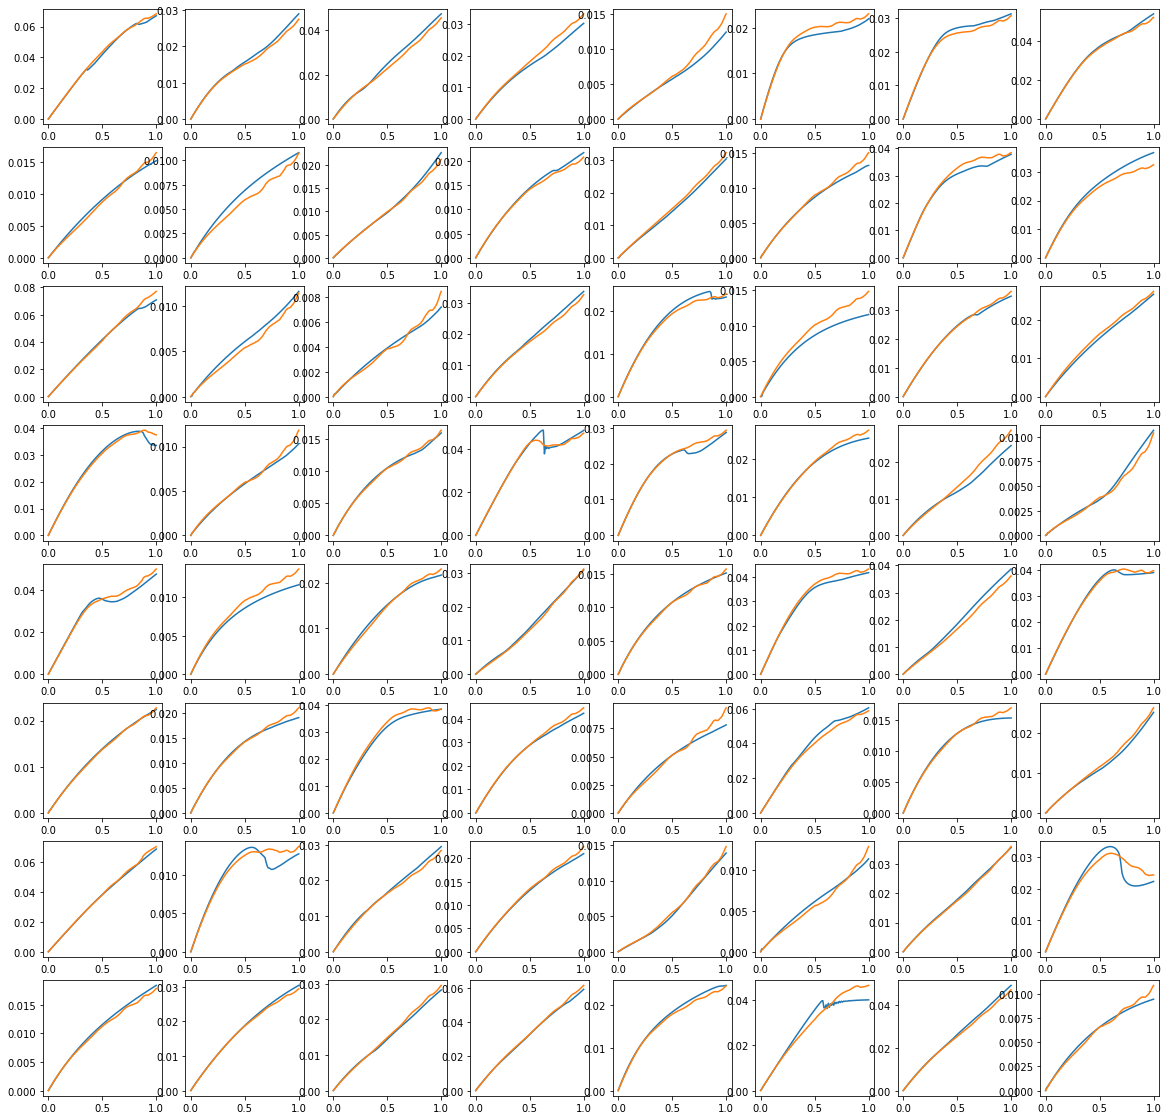

In [8]:
# plot 64 cases selected from testset
y_pred_reduced = model.predict(X_test)
if pca_number == 100:
    y_pred = y_pred_reduced
else:
    y_pred = pca.inverse_transform(y_pred_reduced)

plt.rcParams["figure.figsize"]=20,20
m_plt = 8
n_plt = 8
base_number = 100
fig,axs = plt.subplots(n_plt,m_plt)
for i in range(0,n_plt):
    for j in range(0,m_plt):        
        test_case = i*n_plt + j + base_number
        x = np.linspace(0, 1, 100)
        axs[i,j].plot(x,y_test[test_case,:])
        axs[i,j].plot(x,y_pred[test_case,:])
# fig.tight_layout()

In [9]:
# calculate average NN prediction error
av_err = 0
for k in range(0,y_test.shape[0]):
    av_err += (mean_squared_error(y_test[k,:],y_pred[k,:])/mean_squared_error(y_test[k,:],y_test[k,:]*0))**0.5
print('average prediction error: '+str(av_err/y_test.shape[0]))

average prediction error: 0.05286544845890029


### Neural accelarated evolution strategy (NAES)

Text(0, 0.5, 'stress')

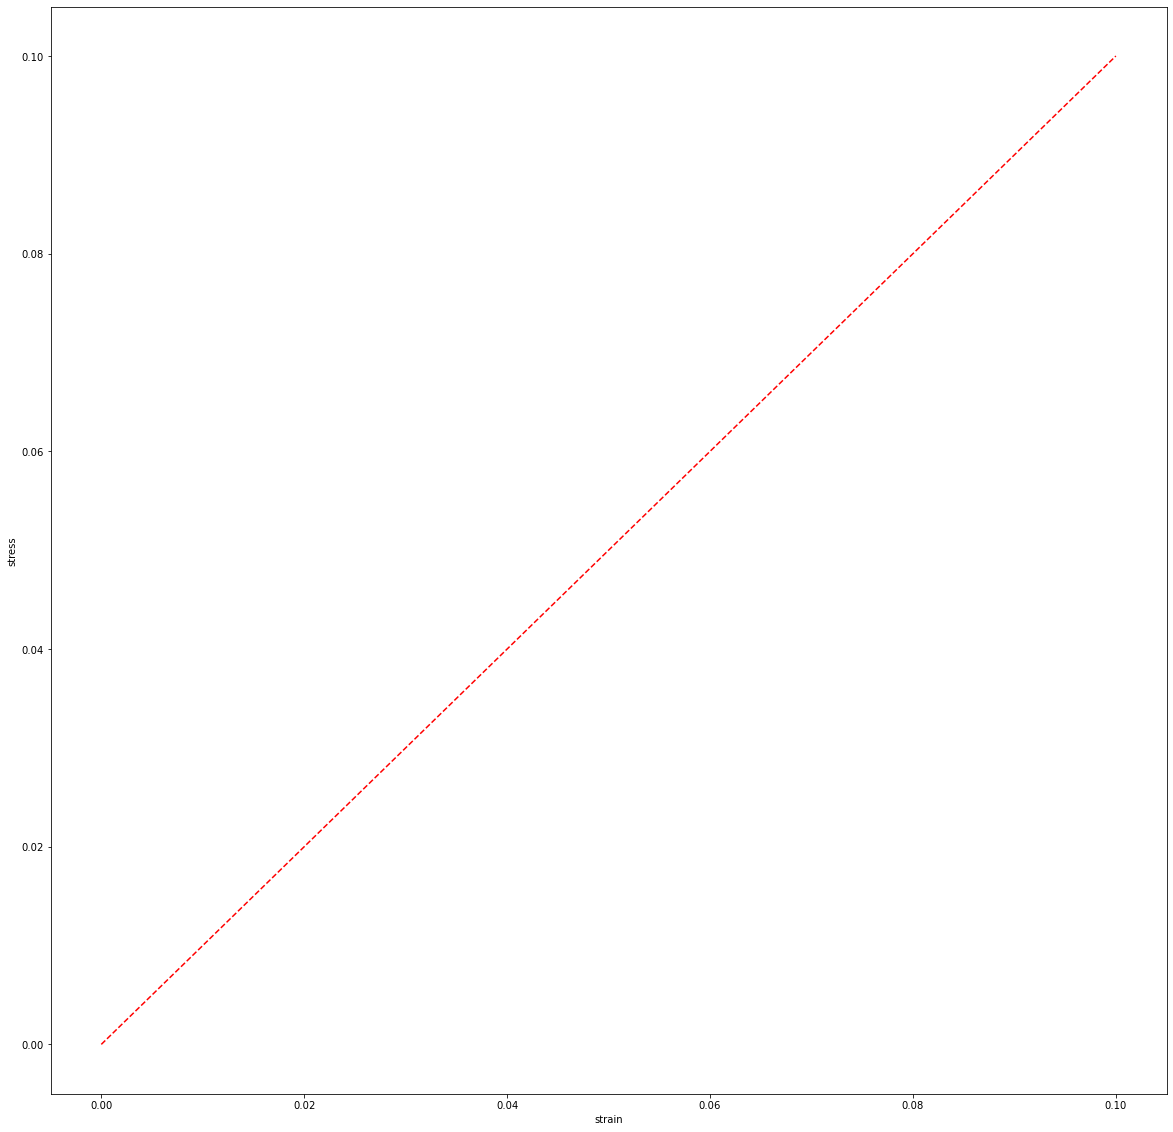

In [10]:
# load target from files
case_name = 'Fig4d_i'
strain = np.linspace(0,0.1,100)
target_stress = np.loadtxt('target_curves/'+case_name+'.txt', delimiter=',')
# target can also be defined analytically as a function of strain

plt.plot(strain,target_stress,'--r')
plt.xlabel('strain')
plt.ylabel('stress')

In [12]:
# Evolution strategy hyperparameters
dof = 16 # dimension of the space
table_size = 10000 # total number of cases to evaluate per iteration
parents_number = 100 # number of parents
children_number = 49 # number of children
rand_expand = 0.1 # range of perturbation for each mutation
rand_rand = 1 # range of perturbation for fully random cases

# construct the initial table using training set data
op_table = pd.DataFrame(X_train) 

# estimate error based on true values
target_scale = mean_squared_error(target_stress,0*target_stress) 
target_error = [mean_squared_error(target_stress,y_train[k,:])/target_scale for k in range(0,y_train.shape[0])]

# add a column for error into the table
op_table.insert(0, "error", target_error, True)

# sort based on error
op_table1 = op_table.sort_values(by="error")

op_table = pd.DataFrame(np.zeros((table_size, dof)))
op_table.insert(0, "error", 0, True)

op_table.iloc[0:len(op_table1),:] = op_table1.iloc[:,:]

In [13]:
def bad_sample(input_design):
    # this function takes input design and determine if this design is a bad design
    # (see SI S4 for constraints on designs)
    rc_rand0 = input_design.reshape([4,2,2],order="F")
    n0 = 4; m0 = 2;
    rc_rand = np.zeros([4,3,3])
    rc_rand[:,0:2,0:2] = rc_rand0
    rc_rand[:,0:2,2] = rc_rand0[:,0:2,0]
    rc_rand[:,2,0:2] = rc_rand0[:,0,0:2]
    hori_s = np.zeros([2,n0,m0+1])
    vert_s = np.zeros([2,n0+1,m0+1])
    vert_s[:,1:4,0:3] = rc_rand[0:2,:,:]
    hori_s[:,1:4,0:3] = rc_rand[2:4,:,:]
    hori_s[:,n0-1,:] = 0

    # calculate the inner angles and edge lengths
    pi = 3.141592
    ang_min = pi
    len_min = 1
    angv_min = pi
    cross_min = 1
    edge_direct = 0
    for i in range(0,n0):
        for j in range(0,m0):
            R0_right = [+0.5,0] + hori_s[:,i,j+1]
            R0_left = [-0.5,0] + hori_s[:,i,j]
            R0_up = [0,+0.5] + vert_s[:,i+1,j]
            R0_down = [0,-0.5] + vert_s[:,i,j]
            ev1 = R0_up - R0_right
            ev2 = R0_left - R0_up
            ev3 = R0_down - R0_left
            ev4 = R0_right - R0_down
            
            if ev1[0]>0 or ev1[1]<0 or ev2[0]>0 or ev2[1]>0 or ev3[0]<0 or ev3[1]>0 or ev4[0]<0 or ev4[1]<0:
                edge_direct = 1

            norm1 = np.linalg.norm(ev1)
            norm2 = np.linalg.norm(ev2)
            norm3 = np.linalg.norm(ev3)
            norm4 = np.linalg.norm(ev4)

            ang1 = np.arccos(np.dot(ev2, -ev1)/np.linalg.norm(ev1)/np.linalg.norm(ev2))
            ang2 = np.arccos(np.dot(ev3, -ev2)/np.linalg.norm(ev2)/np.linalg.norm(ev3))
            ang3 = np.arccos(np.dot(ev4, -ev3)/np.linalg.norm(ev3)/np.linalg.norm(ev4))
            ang4 = np.arccos(np.dot(ev1, -ev4)/np.linalg.norm(ev4)/np.linalg.norm(ev1))

            min_len = min([norm1,norm2,norm3,norm4])
            min_ang = min([ang1,ang2,ang3,ang4])
            min_angv = min([ang1,ang3])
            if min_len < len_min:
                len_min = min_len;
            if min_ang < ang_min:
                ang_min = min_ang
            if min_angv < angv_min:
                angv_min = min_angv
                
    if len_min<0.2 or ang_min < pi/4:
        # if the shortest edge length smaller than 0.2 or smallest inner angle smaller than pi/4
        # then it is a bad design
        return 1
    else:
        return 0

def match_error(input_stress,input_design,target_stress,target_scale):
    # return error of the match
    # normalized mean square error between the curves
    basic_error = mean_squared_error(target_stress,input_stress)/target_scale
    # additional big error if the sample is considered as bad design
    bad_sample_penalty = 0.05
    bad_sample_error = bad_sample_penalty*bad_sample(input_design)
    return basic_error + bad_sample_error

op_table = op_table.head(table_size)
err_history = np.empty([50,100])

# evolution strategy
for iter in range(0,50):
    for k in range(1,children_number+1):
        # for each parant perturb their geometry 
        op_table.iloc[parents_number*k:(k+1)*parents_number,1:] = op_table.iloc[0:parents_number,1:].values + rand_expand*(np.random.rand(parents_number,dof)-0.5)
    
    # set a upper limit for perturbing values
    bc = 0.5
    op_table.iloc[0:(k+1)*parents_number,1:][op_table.iloc[0:(k+1)*parents_number,1:]>bc]=bc
    op_table.iloc[0:(k+1)*parents_number,1:][op_table.iloc[0:(k+1)*parents_number,1:]<-bc]=-bc
    
    # assign additional 5000 random samples
    op_table.iloc[(children_number+1)*parents_number:,1:] = rand_rand*(np.random.rand(op_table.iloc[(children_number+1)*parents_number:,1:].shape[0],dof)-0.5)
    
    # curves predicted by NN (surrogate model)
    predicted_curves = pca.inverse_transform(model.predict(op_table.iloc[:,1:]))
    
    # calculate error of the prediction
    target_error = [match_error(predicted_curves[k,:],np.array(op_table.iloc[k,1:]),target_stress,target_scale)
                   for k in range(0,table_size)]
    op_table["error"] = target_error

    # sort based on error
    op_table = op_table.sort_values(by="error")
    clear_output()
    
    display('iteration ' + str(iter))
    display(op_table.head(10))


'iteration 4'

,error,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
6190,0.000264,0.113569,0.179267,0.013934,0.228510,0.155392,0.304244,0.062348,0.312183,0.098769,0.072518,0.077454,-0.170873,-0.005048,0.263119,-0.012311,-0.327080
7124,0.000343,0.098009,0.130664,-0.119299,0.305438,0.121736,0.260317,0.115937,0.238140,0.115864,-0.027273,0.099104,-0.192215,0.091187,0.190814,0.078897,-0.340549
9218,0.000357,0.062593,0.166522,-0.098394,0.255357,0.126304,0.279773,0.077998,0.330487,0.120218,0.041270,0.100693,-0.152006,0.030322,0.250334,0.034299,-0.342070
6113,0.000381,0.062678,0.200110,-0.116187,0.301891,0.072521,0.256161,0.129256,0.254310,0.112253,-0.019197,0.051101,-0.132221,0.074513,0.187024,0.052279,-0.352057
789,0.000382,0.004891,0.108576,-0.184341,0.242655,0.018454,0.250126,0.074376,0.314882,0.144026,-0.057297,0.063073,-0.160678,0.095980,0.165978,0.026711,-0.333793
8931,0.000385,0.111572,0.167982,-0.029744,0.261619,0.204021,0.255285,0.089591,0.354273,0.120975,-0.030328,0.136479,-0.196306,0.104154,0.258938,0.033970,-0.318899
624,0.000386,0.103430,0.173595,-0.042523,0.311889,0.101769,0.316028,0.029444,0.288338,0.070245,-0.035704,0.026769,-0.124137,0.011370,0.167052,0.007372,-0.298021
9428,0.000389,0.098771,0.179932,-0.012702,0.310311,0.085600,0.311911,0.040182,0.314183,0.091895,0.049801,0.049419,-0.162011,0.011287,0.229337,0.002142,-0.317616
6323,0.000403,0.071990,0.099541,-0.099785,0.294547,0.063618,0.267920,0.079611,0.295339,0.143856,0.044773,0.092137,-0.134204,0.044148,0.166903,0.049716,-0.355875
9628,0.000405,0.050071,0.099449,-0.150211,0.218530,0.027300,0.247774,0.017836,0.313227,0.146339,-0.055053,0.068179,-0.164627,0.084579,0.161596,-0.001093,-0.325162


KeyboardInterrupt: 

NameError: name 'top_group' is not defined

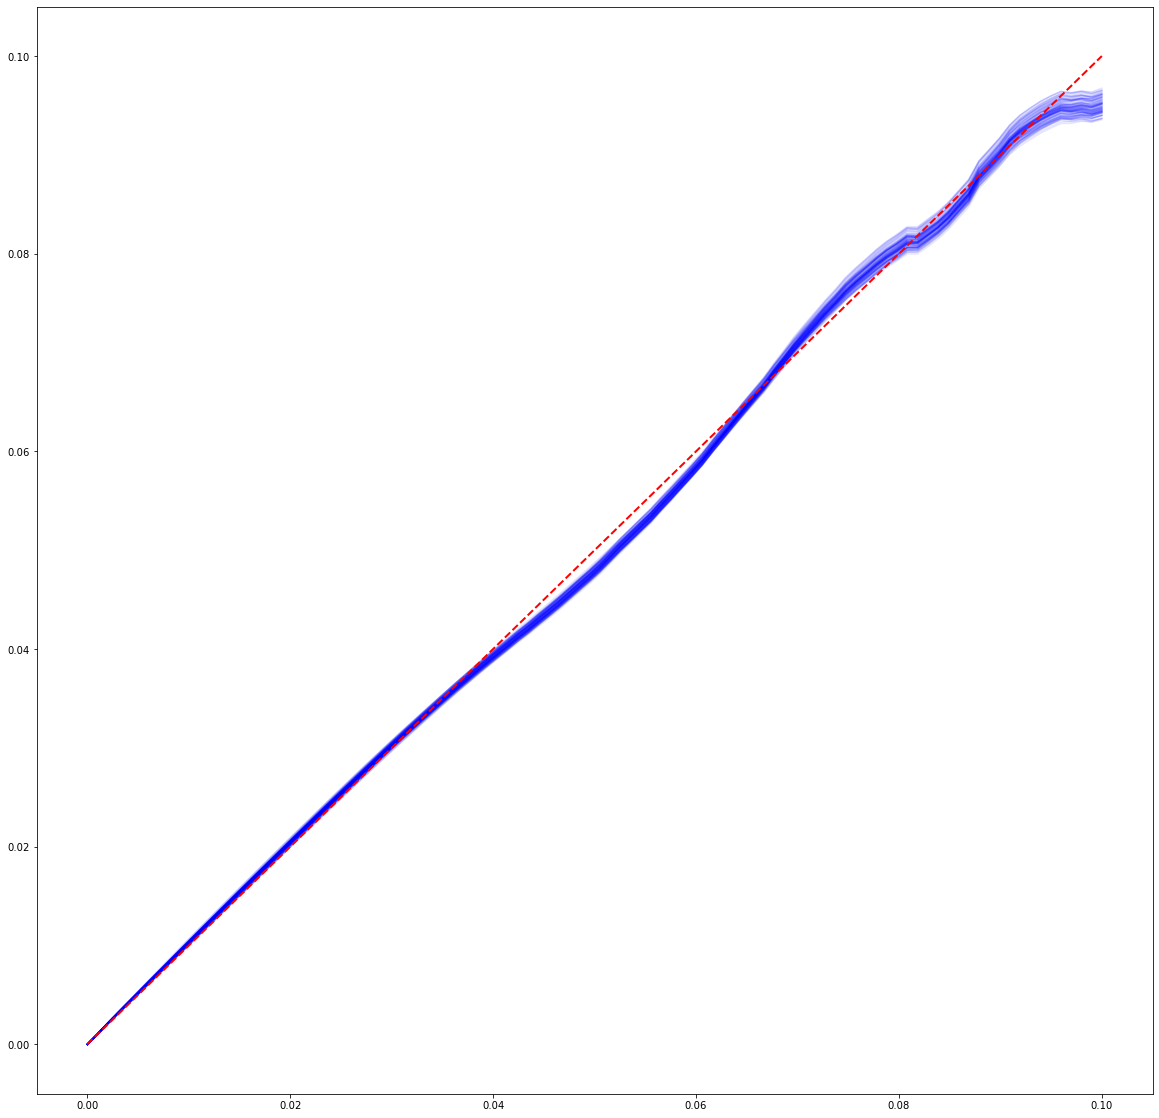

In [15]:
# plot optimized stress-strain curves predicted by NN
predicted_curves = pca.inverse_transform(model.predict(op_table.iloc[0:parents_number,1:]))
for k in range(parents_number):
    plt.plot(strain,predicted_curves[k,:],'-b',alpha=0.1)
plt.plot(strain,target_stress,'--r',linewidth=2.0)

# save optimized designs
np.savetxt('optimized_designs/'+ case_name +'.txt', np.array(op_table.iloc[0:top_group,1:]), delimiter=',')